# Metal-Archives reviews - exploratory analysis

In [72]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

In [249]:
def padded_array(x, pad):
    return np.concatenate((np.ones(pad) * x[0], x, np.ones(pad) * x[-1]))

def smooth(x, kernel, w, pad):
    kernel /= kernel.sum()
    x_smooth = np.convolve(x, kernel, mode='same')
    std = np.sqrt(np.convolve((x - x_smooth)**2, kernel, mode='same'))
    if pad > 0:
        x_smooth = x_smooth[pad:-pad]
    if pad > 0:
        std = std[pad:-pad]
    return x_smooth, std

def gsmooth(x, w=1, pad='auto', kernel_threshold=1e-5):
    if w == 0:
        return x, np.zeros_like(x)
    if pad == 'auto':
        pad = w
    x_padded = padded_array(x, pad)
    kernel_x = np.linspace(-x.size, x.size, x_padded.size)
    sigma = w / (2 * np.sqrt(2 * np.log(2)))
    kernel = np.exp(-kernel_x**2 / (2 * sigma**2))
    kernel[kernel < kernel_threshold] = 0
    return smooth(x_padded, kernel, w, pad)

In [268]:
df = pd.read_csv('reviews.csv')

In [139]:
df_albums = df.groupby('album_name')[[col for col in df.columns if re.match('^(?!review)', col)]].max()
df_albums['album_score'] = (df_albums.album_review_avg - df_albums.album_review_avg.mean()) / df_albums.album_review_avg.std() * df_albums.album_review_num / df_albums.album_review_num.max()


def process_genre(genre):
    # Find words (including hyphenated words) not in parentheses
    out = re.findall('[\w\-]+(?![^(]*\))', genre.lower())
    out = [s for s in out if s != 'metal']
    return out


album_genres = df_albums.band_genre.apply(process_genre)
genres = sorted(set(album_genres.sum()))
for genre in genres:
    df_albums['genre_' + genre] = album_genres.apply(lambda x: int(genre in x))

In [195]:
df_bands = df.groupby('band_name')[[col for col in df.columns if 'band_' in col]].max()
band_genres = df_bands.band_genre.apply(process_genre)
genres = sorted(set(band_genres.sum()))
for genre in genres:
    df_bands['genre_' + genre] = band_genres.apply(lambda x: int(genre in x))

# Weighted score distribution

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


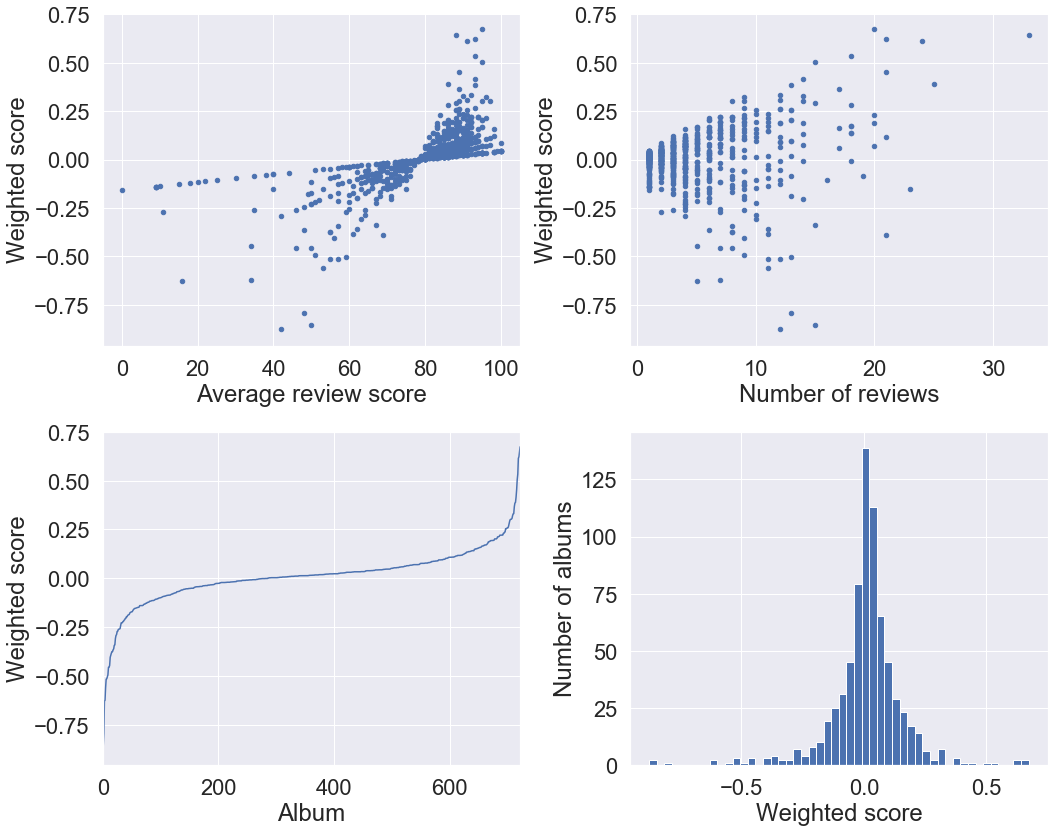

In [84]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

df_albums.plot('album_review_avg', 'album_score', 'scatter', ax=ax[0, 0])
ax[0, 0].set_xlabel("Average review score")
ax[0, 0].set_ylabel("Weighted score")

df_albums.plot('album_review_num', 'album_score', 'scatter', ax=ax[0, 1])
ax[0, 1].set_xlabel("Number of reviews")
ax[0, 1].set_ylabel("Weighted score")

df_albums.album_score.sort_values().reset_index(drop=True).plot(ax=ax[1, 0])
ax[1, 0].set_xlabel("Album")
ax[1, 0].set_ylabel("Weighted score")

df_albums.album_score.hist(bins=50, ax=ax[1, 1])
ax[1, 1].set_xlabel("Weighted score")
ax[1, 1].set_ylabel("Number of albums")

fig.tight_layout()

# Best and worst scoring albums

In [80]:
df_albums.sort_values('album_score', ascending=False)[:20]

,band_name,band_id,band_url,band_country_of_origin,band_location,band_status,band_formed_in,band_genre,band_lyrical_themes,band_last_label,...,album_name,album_type,album_year,album_review_num,album_review_avg,album_url,album_reviews_url,album_song_names,band_current_label,album_score
album_name,,,,,,,,,,,,,,,,,,,,,
The Call of the Wretched Sea,Ahab,35791,https://www.metal-archives.com/bands/Ahab/35791,Germany,"Heidelberg, Baden-Württemberg",Active,2004,Funeral Doom Metal,"Literature, The Ocean",NaN,...,The Call of the Wretched Sea,Full-length,2006,20,95,https://www.metal-archives.com/albums/Ahab/The...,https://www.metal-archives.com/reviews/Ahab/Th...,"['Below the Sun', 'The Pacific', 'Old Thunder'...",Napalm Records,0.672901
The Mantle,Agalloch,305,https://www.metal-archives.com/bands/Agalloch/305,United States,"Portland, Oregon",Split-up,1995,Atmospheric Folk/Doom Metal; Post-Rock/Metal,"Nature, Loss, Depression, Death, Winter",Profound Lore Records,...,The Mantle,Full-length,2002,33,88,https://www.metal-archives.com/albums/Agalloch...,https://www.metal-archives.com/reviews/Agalloc...,"['A Celebration for the Death of Man...', 'In ...",NaN,0.645355
Temple of Shadows,Angra,538,https://www.metal-archives.com/bands/Angra/538,Brazil,"São Paulo, São Paulo",Active,1991,Power/Progressive Metal,"Religion, Personal thoughts, Conceits, War, Life",NaN,...,Temple of Shadows,Full-length,2004,21,93,https://www.metal-archives.com/albums/Angra/Te...,https://www.metal-archives.com/reviews/Angra/T...,"['Deus le Volt!', 'Spread Your Fire', 'Angels ...",earMUSIC,0.622013
Ashes Against the Grain,Agalloch,305,https://www.metal-archives.com/bands/Agalloch/305,United States,"Portland, Oregon",Split-up,1995,Atmospheric Folk/Doom Metal; Post-Rock/Metal,"Nature, Loss, Depression, Death, Winter",Profound Lore Records,...,Ashes Against the Grain,Full-length,2006,24,91,https://www.metal-archives.com/albums/Agalloch...,https://www.metal-archives.com/reviews/Agalloc...,"['Limbs', 'Falling Snow', 'This White Mountain...",NaN,0.614263
Black Gives Way to Blue,Alice in Chains,753,https://www.metal-archives.com/bands/Alice+in+...,United States,"Seattle, Washington",Active,1987,Heavy Metal/Grunge,"Depression, Drugs, Suicide, Death, Pain",NaN,...,Black Gives Way to Blue,Full-length,2009,18,93,https://www.metal-archives.com/albums/Alice_in...,https://www.metal-archives.com/reviews/Alice_i...,"['All Secrets Known', 'Check My Brain', 'Last ...",BMG,0.533154
When the Kite String Pops,Acid Bath,19,https://www.metal-archives.com/bands/Acid+Bath/19,United States,"Houma/Morgan City, Louisiana",Split-up,1991,Sludge/Doom Metal,"Death, Abortion, Drugs, Dark humor, Doom, Love",Rotten Records,...,When the Kite String Pops,Full-length,1994,15,95,https://www.metal-archives.com/albums/Acid_Bat...,https://www.metal-archives.com/reviews/Acid_Ba...,"['The Blue', 'Tranquilized', 'Cheap Vodka', 'F...",NaN,0.504676
Among the Living,Anthrax,169,https://www.metal-archives.com/bands/Anthrax/169,United States,"Yonkers, New York",Active,1981,Speed/Thrash Metal; Groove Metal,"Humor, Hardship, Social issues, Anti-fascism",NaN,...,Among the Living,Full-length,1987,21,89,https://www.metal-archives.com/albums/Anthrax/...,https://www.metal-archives.com/reviews/Anthrax...,"['Among the Living', 'Caught in a Mosh', 'I Am...",Megaforce Records,0.452947
Persistence of Time,Anthrax,169,https://www.metal-archives.com/bands/Anthrax/169,United States,"Yonkers, New York",Active,1981,Speed/Thrash Metal; Groove Metal,"Humor, Hardship, Social issues, Anti-fascism",NaN,...,Persistence of Time,Full-length,1990,14,93,https://www.metal-archives.com/albums/Anthrax/...,https://www.metal-archives.com/reviews/Anthrax...,"['Time', 'Blood', 'Keep It in the Family', 'In...",Megaforce Records,0.414675
With Oden on Our Side,Amon Amarth,150,https://www.metal-archives.com/bands/Amon+Amar...,Sweden,Stockholm,Active,1992,Melodic Death Metal,"Vikings, Warfare, Mythology, Destruction",NaN,...,With Oden on Our Side,Full-length

In [81]:
df_albums.sort_values('album_score')[:20]

,band_name,band_id,band_url,band_country_of_origin,band_location,band_status,band_formed_in,band_genre,band_lyrical_themes,band_last_label,...,album_name,album_type,album_year,album_review_num,album_review_avg,album_url,album_reviews_url,album_song_names,band_current_label,album_score
album_name,,,,,,,,,,,,,,,,,,,,,
In the End of Human Existence,Abominable Putridity,43778,https://www.metal-archives.com/bands/Abominabl...,Russia,Moscow,Active,2003,Slam/Brutal Death Metal,"Conspiracies, Genetic mutation, Biology, Horro...",NaN,...,In the End of Human Existence,Full-length,2007,12,42,https://www.metal-archives.com/albums/Abominab...,https://www.metal-archives.com/reviews/Abomina...,"['Intracranial Parasite', 'Entrails Full of Ve...",Unique Leader Records,-0.876330
All for You,Annihilator,140,https://www.metal-archives.com/bands/Annihilat...,Canada,"Ottawa, Ontario (early/later); Vancouver, Brit...",Active,1984,Technical Speed/Thrash Metal (early); Groove/T...,"Metal, Perversion, Mental demons, Paranoia, Ps...",NaN,...,All for You,Full-length,2004,15,50,https://www.metal-archives.com/albums/Annihila...,https://www.metal-archives.com/reviews/Annihil...,"['All for You', 'Dr. Psycho', 'Demon Dance', '...",Silver Lining Music,-0.853890
Metal,Annihilator,140,https://www.metal-archives.com/bands/Annihilat...,Canada,"Ottawa, Ontario (early/later); Vancouver, Brit...",Active,1984,Technical Speed/Thrash Metal (early); Groove/T...,"Metal, Perversion, Mental demons, Paranoia, Ps...",NaN,...,Metal,Full-length,2007,13,48,https://www.metal-archives.com/albums/Annihila...,https://www.metal-archives.com/reviews/Annihil...,"['Clown Parade', 'Couple Suicide', 'Army of On...",Silver Lining Music,-0.792368
A War You Cannot Win,All That Remains,1283,https://www.metal-archives.com/bands/All+That+...,United States,"Springfield, Massachusetts",Active,1998,Metalcore/Melodic Death Metal (early); Metalco...,"Relationships, Personal struggles, Society, Hope",NaN,...,A War You Cannot Win,Full-length,2012,5,16,https://www.metal-archives.com/albums/All_That...,https://www.metal-archives.com/reviews/All_Tha...,"['Down Through the Ages', ""You Can't Fill My S...",Razor & Tie,-0.626787
Mad Grandiose Bloodfiends,Ancient,772,https://www.metal-archives.com/bands/Ancient/772,Norway,"Bergen, Vestland (early/now); United States (m...",Active,1992,Melodic Black Metal,"Satanism (early), Vampirism, Fears, Horror",NaN,...,Mad Grandiose Bloodfiends,Full-length,1997,7,34,https://www.metal-archives.com/albums/Ancient/...,https://www.metal-archives.com/reviews/Ancient...,"['Malkavian Twilight', 'A Mad Blood Scenario',...",Soulseller Records,-0.623903
War Eternal,Arch Enemy,10,https://www.metal-archives.com/bands/Arch+Enem...,Sweden,"Halmstad, Halland",Active,1995,Melodic Death Metal,"Humanity, Anti-religion, Rebellion, Society",NaN,...,War Eternal,Full-length,2014,11,53,https://www.metal-archives.com/albums/Arch_Ene...,https://www.metal-archives.com/reviews/Arch_En...,"['Tempore Nihil Sanat (Prelude in F minor)', '...",Century Media Records,-0.559767
The Root of All Evil,Arch Enemy,10,https://www.metal-archives.com/bands/Arch+Enem...,Sweden,"Halmstad, Halland",Active,1995,Melodic Death Metal,"Humanity, Anti-religion, Rebellion, Society",NaN,...,The Root of All Evil,Full-length,2009,11,55,https://www.metal-archives.com/albums/Arch_Ene...,https://www.metal-archives.com/reviews/Arch_En...,"['The Root of All Evil (Intro)', 'Beast of Man...",Century Media Records,-0.515488
Anthems of Rebellion,Arch Enemy,10,https://www.metal-archives.com/bands/Arch+Enem...,Sweden,"Halmstad, Halland",Active,1995,Melodic Death Metal,"Humanity, Anti-religion, Rebellion, Society",NaN,...,Anthems of Rebellion,Full-length,2003,12,57,https://www.metal-archives.com/albums/Arch_Ene...,https://www.metal-archives.com/reviews/Arch_En...,"['Tear Down the Walls', 'Silent Wars', 'We Wil...",Century Media Records,-0.514046
Set the World on Fire,Annihilator,140,https://www.metal-archives.com/bands/Annihilat...,Canad

# Best and worst scoring bands

In [206]:
df_albums.groupby('band_name').album_score.sum().sort_values(ascending=False)

band_name
Angra               1.972773
Amorphis            1.702477
Alice in Chains     1.582882
Agalloch            1.382877
Anaal Nathrakh      0.991212
                      ...   
Ajattara           -0.949297
Animae Capronii    -1.120737
All That Remains   -1.410712
Arch Enemy         -1.965546
Annihilator        -3.151408
Name: album_score, Length: 135, dtype: float64

# Best and worst scoring genres

In [145]:
genre_data = []
for genre in genres:
    df_genre = df_albums[df_albums['genre_' + genre] > 0]
    x = (genre, df_genre.shape[0], df_genre.album_score.mean(), df_genre.album_score.max())
    genre_data.append(x)
genre_ratings = pd.DataFrame(genre_data, columns=['genre', 'albums', 'avgscore', 'maxscore']).sort_values('avgscore', ascending=False)
genre_ratings[genre_ratings['albums'] > 10].sort_values('avgscore', ascending=False)

,genre,albums,avgscore,maxscore
2,atmospheric,15,0.101300,0.645355
39,progressive,84,0.084615,0.622013
14,doom,71,0.082166,0.672901
3,avant-garde,12,0.071596,0.301965
19,folk,34,0.055047,0.645355
27,industrial,23,0.048033,0.330142
26,heavy,119,0.040898,0.533154
22,grindcore,29,0.036753,0.330142
54,viking,16,0.035076,0.255943
38,power,98,0.026355,0.622013


# Geographic distribution of bands, albums, and genres

Text(0.5, 1.0, 'Number of bands from each country')

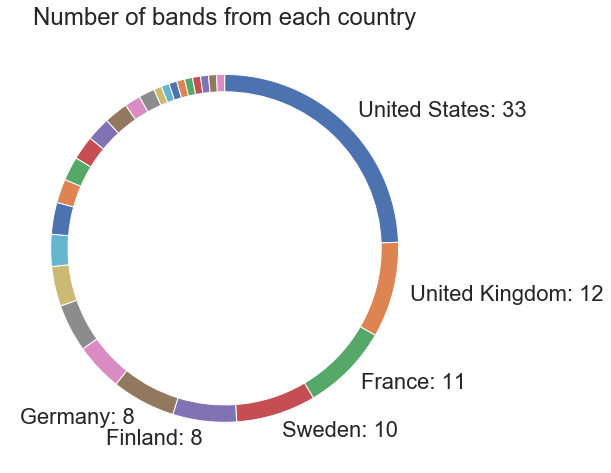

In [198]:
countries_num_bands = df_bands.groupby('band_country_of_origin').apply(len).sort_values(ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pie(
    countries_num_bands.values,
    labels=[('{}: {}'.format(country, num_bands) if num_bands > 0.05 * countries_num_bands.sum() else '')
            for country, num_bands in countries_num_bands.items()],
    wedgeprops=dict(width=0.1),
    startangle=90,
    counterclock=False
)
ax.set_aspect('equal')
ax.set_title('Number of bands from each country')

Text(0.5, 1.0, 'Number of albums from each country')

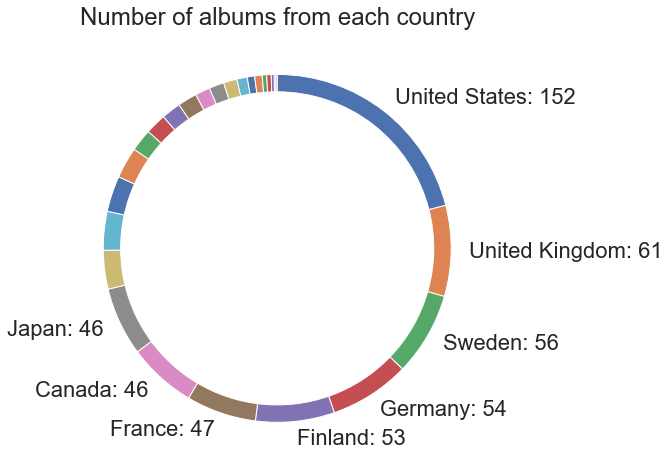

In [156]:
countries_num_albums = df_albums.groupby('band_country_of_origin').apply(len).sort_values(ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pie(
    countries_num_albums.values,
    labels=[('{}: {}'.format(country, num_albums) if num_albums > 0.05 * countries_num_albums.sum() else '')
            for country, num_albums in countries_num_albums.items()],
    wedgeprops=dict(width=0.1),
    startangle=90,
    counterclock=False
)
ax.set_aspect('equal')
ax.set_title('Number of albums from each country')

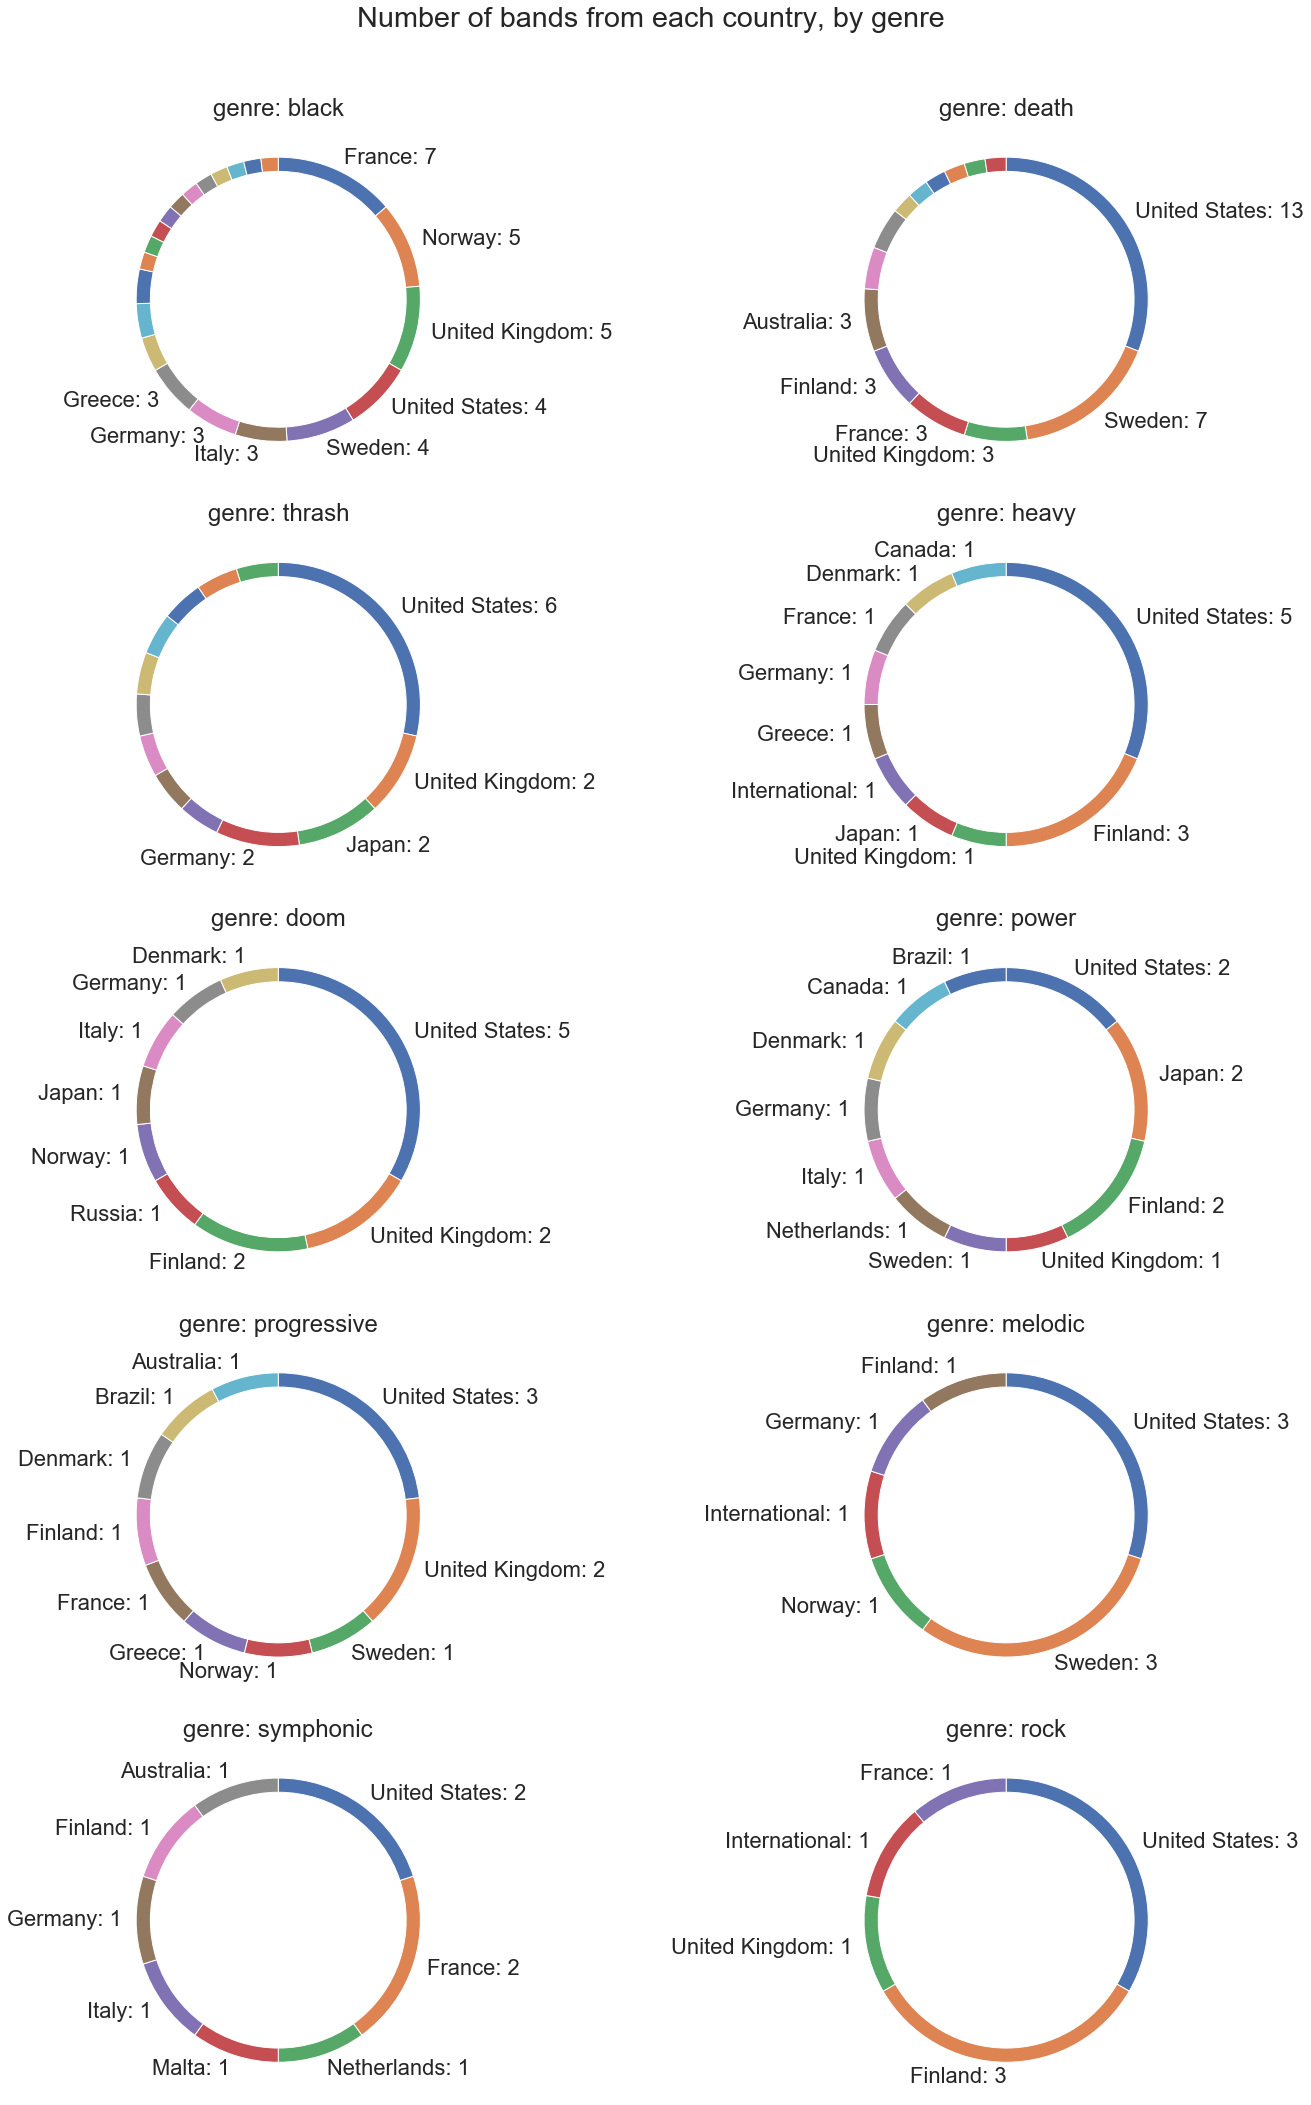

In [199]:
genres_num_bands = df_bands[[col for col in df_bands.columns if 'genre_' in col]].sum(0).sort_values(ascending=False)[:10]
fig, ax = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle("Number of bands from each country, by genre")
ax = ax.flatten()
for i, col in enumerate(genres_num_bands.index):
    countries_genre_num_bands = df_bands[df_bands[col] > 0].groupby('band_country_of_origin').apply(len).sort_values(ascending=False)
    ax[i].pie(
        countries_genre_num_bands.values,
        labels=[('{}: {}'.format(country, num_bands) if num_bands > 0.05 * countries_genre_num_bands.sum() else '')
                for country, num_bands in countries_genre_num_bands.items()],
        wedgeprops=dict(width=0.1),
        startangle=90,
        counterclock=False
    )
    ax[i].set_aspect('equal')
    ax[i].set_title(f'genre: {col[6:]}')
fig.tight_layout(rect=[0, 0, 1, 0.95])

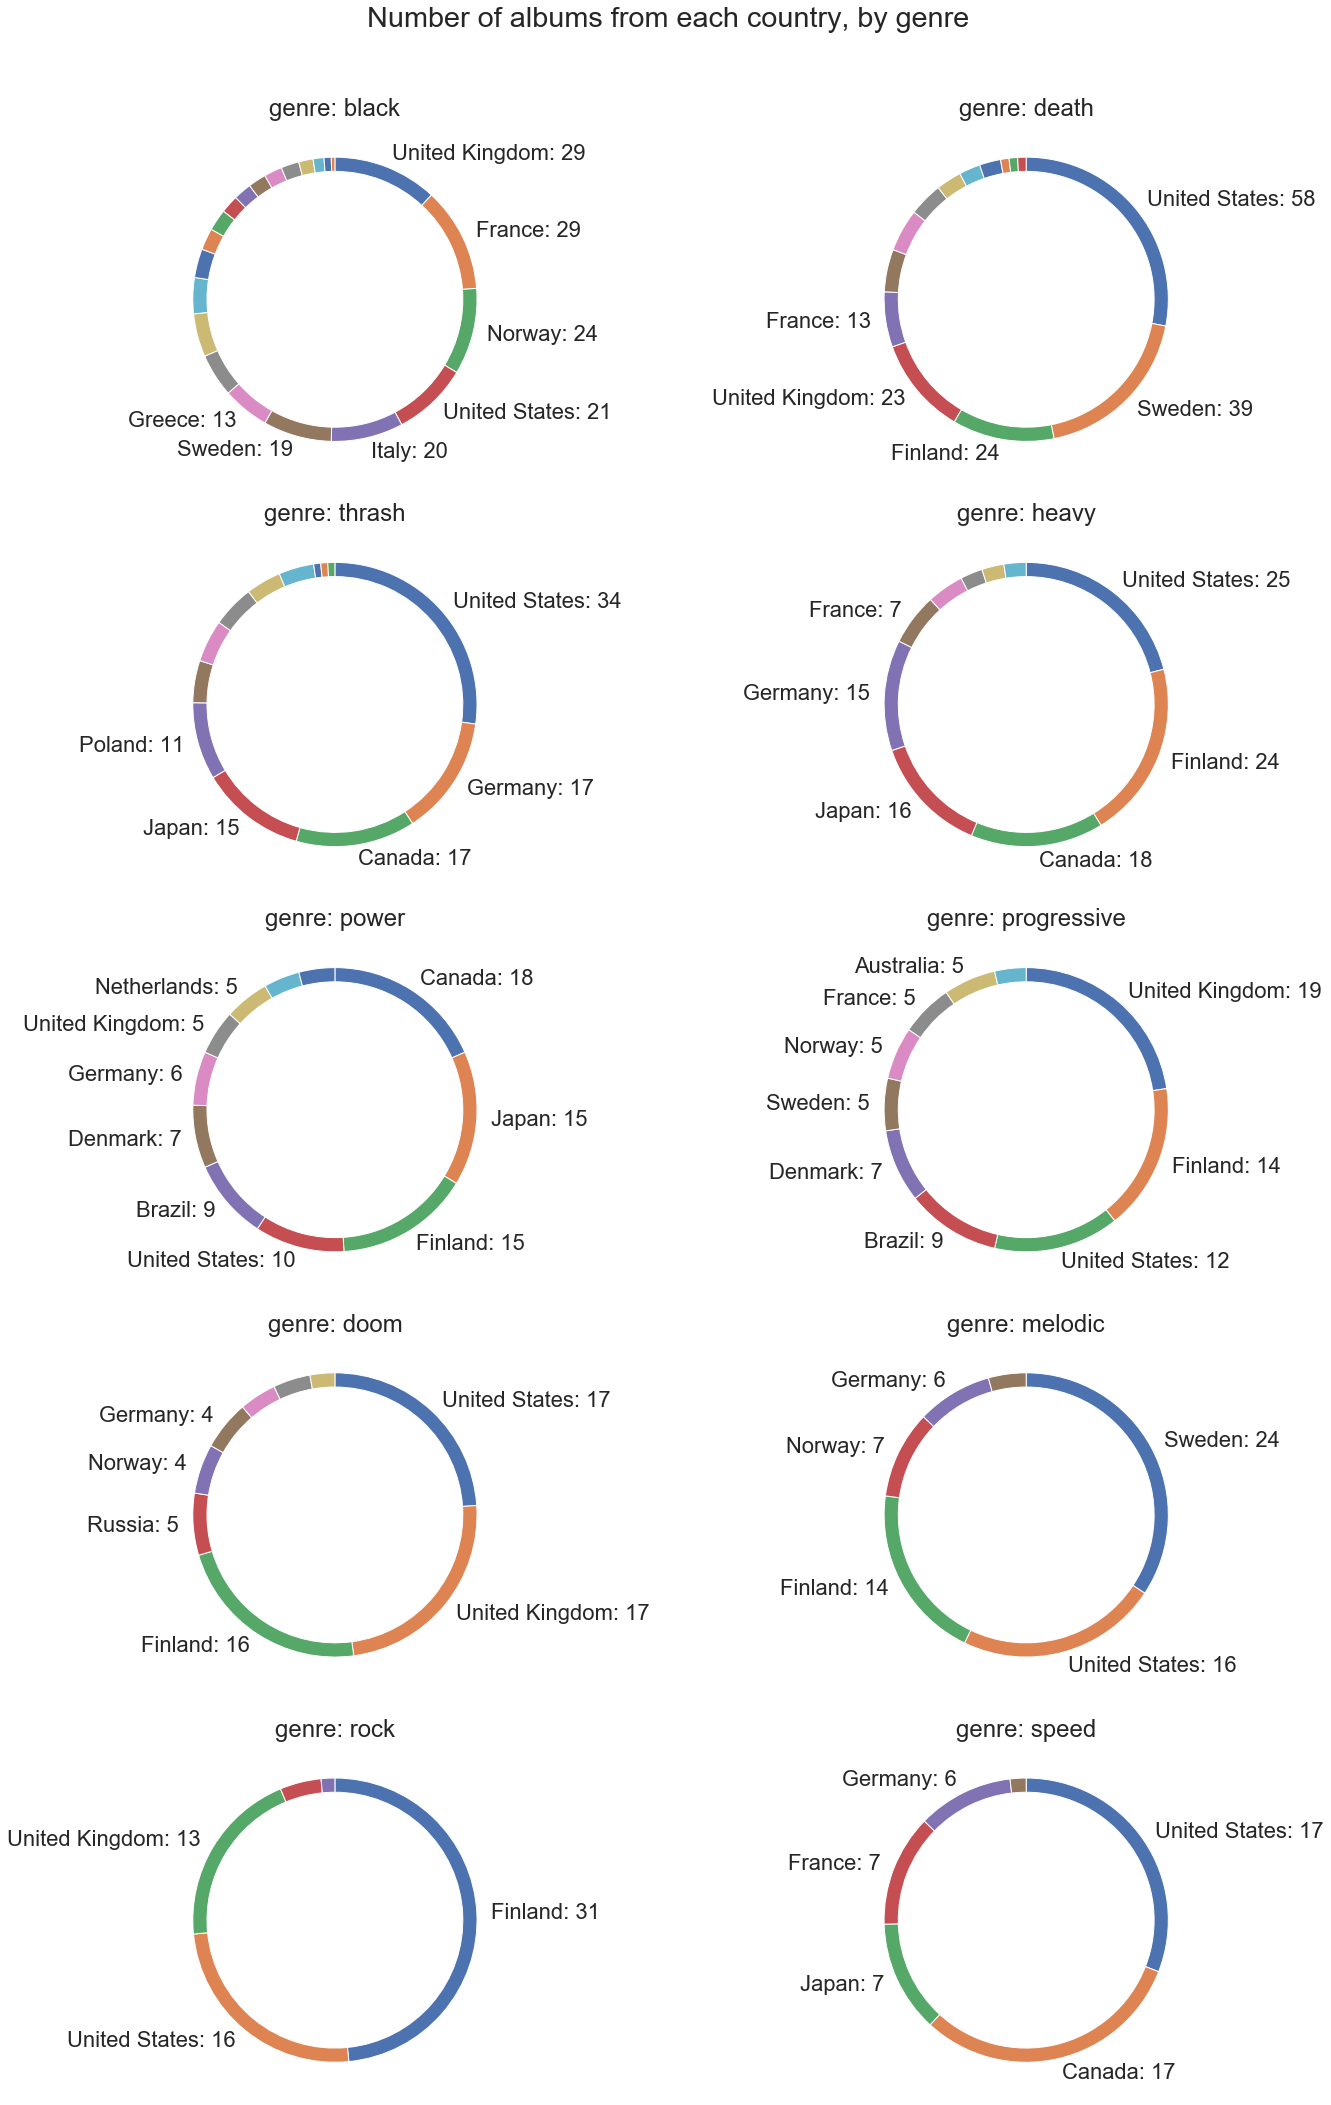

In [192]:
genres_num_albums = df_albums[[col for col in df_albums.columns if 'genre_' in col]].sum(0).sort_values(ascending=False)[:10]
fig, ax = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle("Number of albums from each country, by genre")
ax = ax.flatten()
for i, col in enumerate(genres_num_albums.index):
    countries_genre_num_albums = df_albums[df_albums[col] > 0].groupby('band_country_of_origin').apply(len).sort_values(ascending=False)
    ax[i].pie(
        countries_genre_num_albums.values,
        labels=[('{}: {}'.format(country, num_albums) if num_albums > 0.05 * countries_genre_num_albums.sum() else '')
                for country, num_albums in countries_genre_num_albums.items()],
        wedgeprops=dict(width=0.1),
        startangle=90,
        counterclock=False
    )
    ax[i].set_aspect('equal')
    ax[i].set_title(f'genre: {col[6:]}')
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Decline of top-rated bands

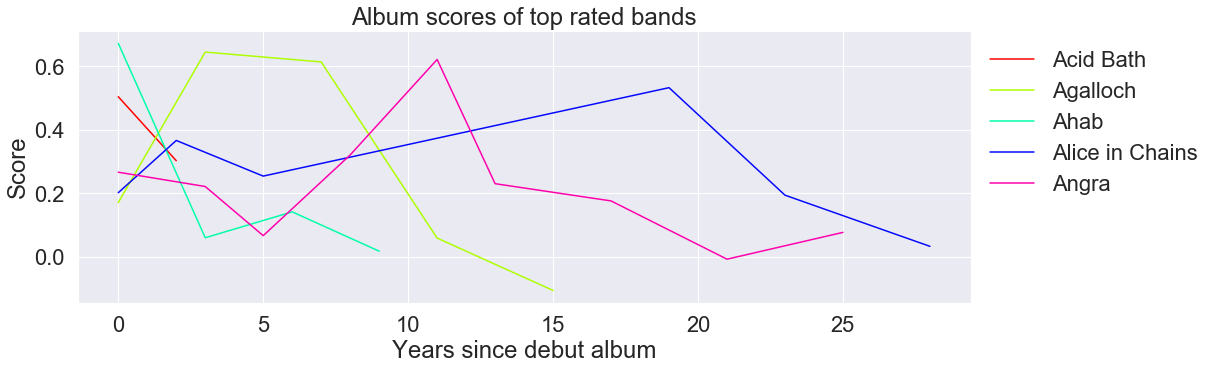

In [243]:
bands = sorted(set(df_albums.band_name))
band_scores = {}
for band in bands:
    df_band = df_albums[df_albums.band_name == band].sort_values('album_year')
    if df_band.album_score.max() > 0.5 and df_band.shape[0] > 1:
        band_scores[band] = (df_band.album_year.values, df_band.album_score.values)
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
cmap = plt.cm.hsv
ax.set_prop_cycle(color=[cmap(i) for i in np.linspace(0, 0.9, len(band_scores))])
for band, (years, scores) in band_scores.items():
    ax.plot(years - years.min(), scores, label=band)
ax.set_title('Album scores of top rated bands')
ax.set_xlabel('Years since debut album')
ax.set_ylabel('Score')
ax.legend(bbox_to_anchor=(1, 1))

# Global album trends

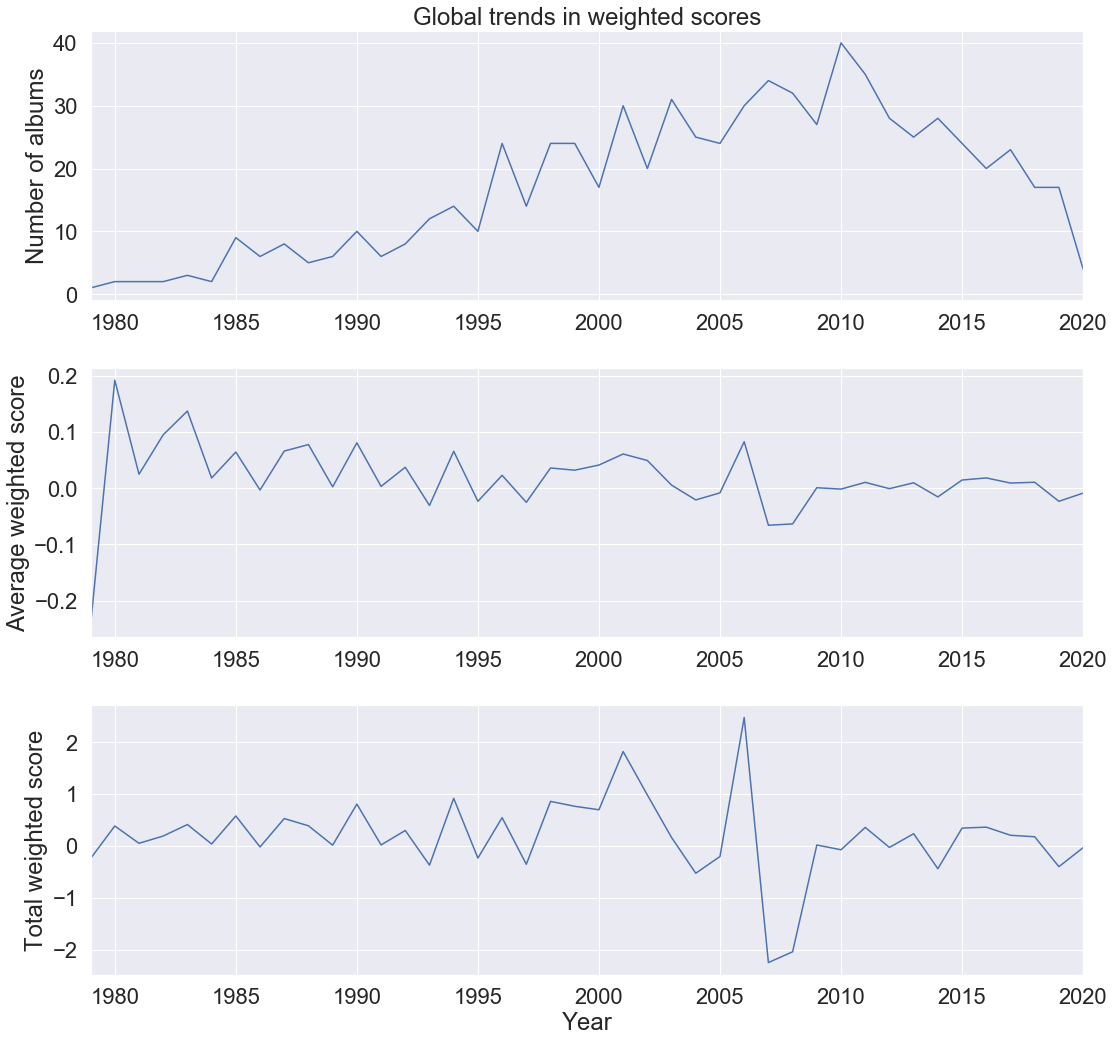

In [246]:
fig, ax = plt.subplots(3, 1, figsize=(16, 15))
df_albums.groupby('album_year').size().plot(ax=ax[0])
df_albums.groupby('album_year')['album_score'].mean().plot(ax=ax[1])
df_albums.groupby('album_year')['album_score'].sum().plot(ax=ax[2])
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('Year')
ax[0].set_ylabel('Number of albums')
ax[1].set_ylabel('Average weighted score')
ax[2].set_ylabel('Total weighted score')
ax[0].set_title('Global trends in weighted scores')
fig.tight_layout()
plt.show()

# Genre trends

## Yearly album output

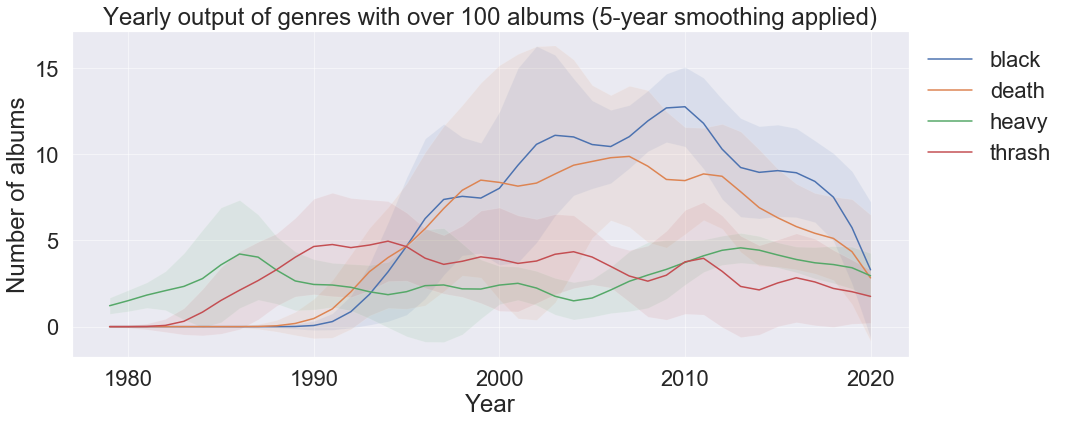

In [277]:
min_albums = 100
smoothing = 5
genre_years = df_albums.groupby('album_year')[df_albums.columns[df_albums.columns.str.contains('genre_')]].sum()
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
for i, col in genre_years.iteritems():
    if col.sum() > min_albums:
        x = col.index
        y, y_std = gsmooth(col.values, smoothing)
        plt.plot(x, y, label=i.replace('genre_', ''))
        plt.fill_between(x, y - 2 * y_std, y + 2 * y_std, alpha=0.1)
ax.set_xlabel('Year')
ax.set_ylabel('Number of albums')
if smoothing > 0:
    title = 'Yearly output of genres with over {} albums ({}-year smoothing applied)'.format(min_albums, smoothing)
else:
    title = 'Yearly output of genres with over {} albums'.format(min_albums)
ax.set_title(title)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(alpha=0.5)

## Yearly average album score

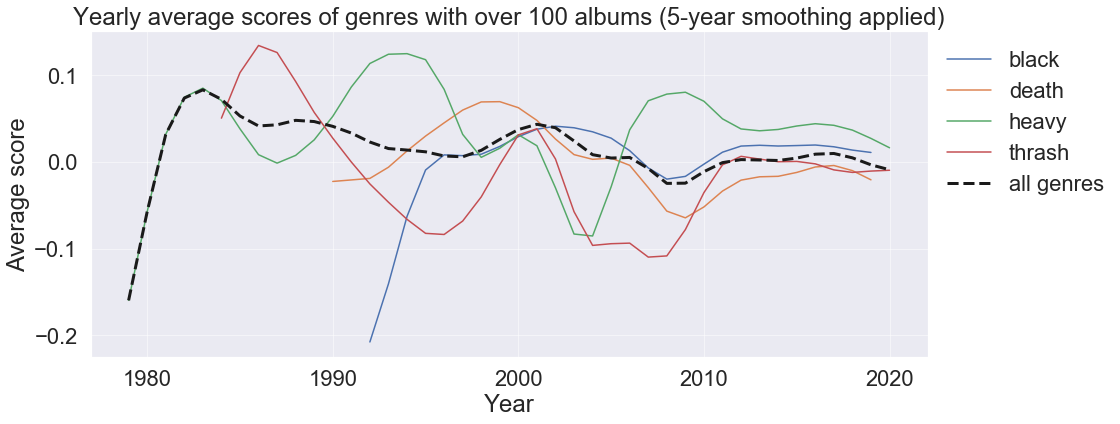

In [278]:
min_albums = 100
smoothing = 5
fig, ax = plt.subplots(1, 1, figsize=(15,6))
for genre in genres:
    df_genre = df_albums[df_albums['genre_' + genre] > 0][['album_year', 'album_score']].sort_values('album_year').reset_index(drop=True)
    if len(df_genre) > min_albums:
        series = df_genre.groupby('album_year').album_score.mean()
        x = series.index
        y, y_std = gsmooth(series.values, smoothing)
        plt.plot(x, y, label=genre.replace('genre_', ''))
avg = df_albums.groupby('album_year').album_score.mean()
x = avg.index
y, y_std = gsmooth(avg.values, smoothing)
ax.plot(x, y, 'k--', lw=3, label='all genres')
ax.set_xlabel('Year')
ax.set_ylabel('Average score')
if smoothing > 0:
    title = 'Yearly average scores of genres with over {} albums ({}-year smoothing applied)'.format(min_albums, smoothing)
else:
    title = 'Yearly average scores of genres with over {} albums'.format(min_albums)
ax.set_title(title)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(alpha=0.5)

## Yearly total album score

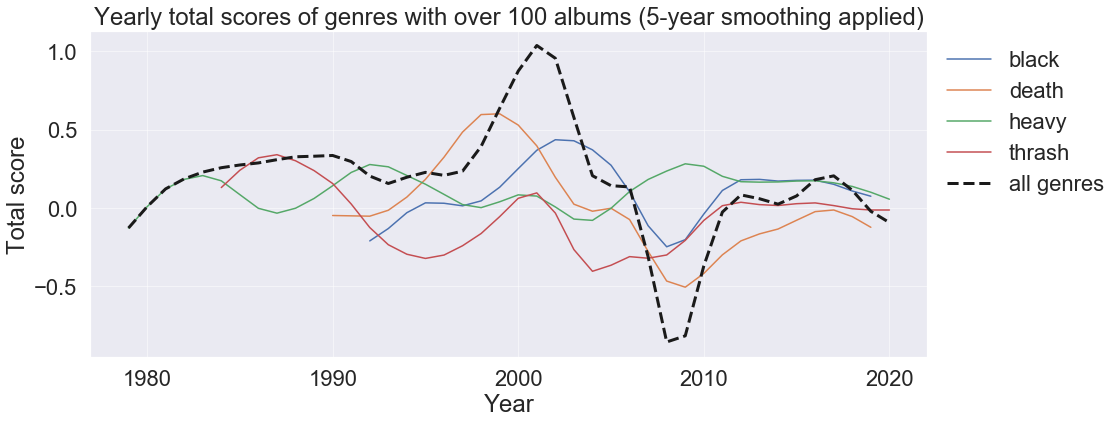

In [279]:
min_albums = 100
smoothing = 5
fig, ax = plt.subplots(1, 1, figsize=(15,6))
for genre in genres:
    df_genre = df_albums[df_albums['genre_' + genre] > 0][['album_year', 'album_score']].sort_values('album_year').reset_index(drop=True)
    if len(df_genre) > min_albums:
        series = df_genre.groupby('album_year').album_score.sum()
        x = series.index
        y, y_std = gsmooth(series.values, smoothing)
        plt.plot(x, y, label=genre.replace('genre_', ''))
avg = df_albums.groupby('album_year').album_score.sum()
x = avg.index
y, y_std = gsmooth(avg.values, smoothing)
ax.plot(x, y, 'k--', lw=3, label='all genres')
ax.set_xlabel('Year')
ax.set_ylabel('Total score')
if smoothing > 0:
    title = 'Yearly total scores of genres with over {} albums ({}-year smoothing applied)'.format(min_albums, smoothing)
else:
    title = 'Yearly total scores of genres with over {} albums'.format(min_albums)
ax.set_title(title)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(alpha=0.5)

# Geographic trends

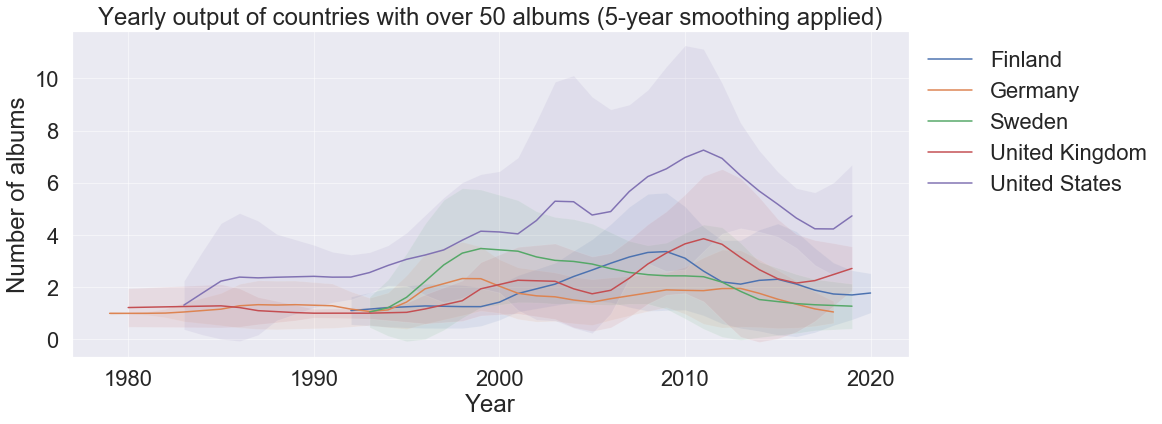

In [280]:
min_albums = 50
smoothing = 5
countries_albums = df_albums.groupby('band_country_of_origin').size()
countries = countries_albums[countries_albums > min_albums]
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
for country in countries.index:
    df_country = df_albums[df_albums['band_country_of_origin'] == country]
    series = df_country.groupby('album_year').size()
    x = series.index
    y, y_std = gsmooth(series.values, smoothing)
    ax.plot(x, y, label=country)
    ax.fill_between(x, y - 2 * y_std, y + 2 * y_std, alpha=0.1)
ax.set_xlabel('Year')
ax.set_ylabel('Number of albums')
if smoothing > 0:
    title = 'Yearly output of countries with over {} albums ({}-year smoothing applied)'.format(min_albums, smoothing)
else:
    title = 'Yearly output of countries with over {} albums'.format(min_albums)
ax.set_title(title)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(alpha=0.5)

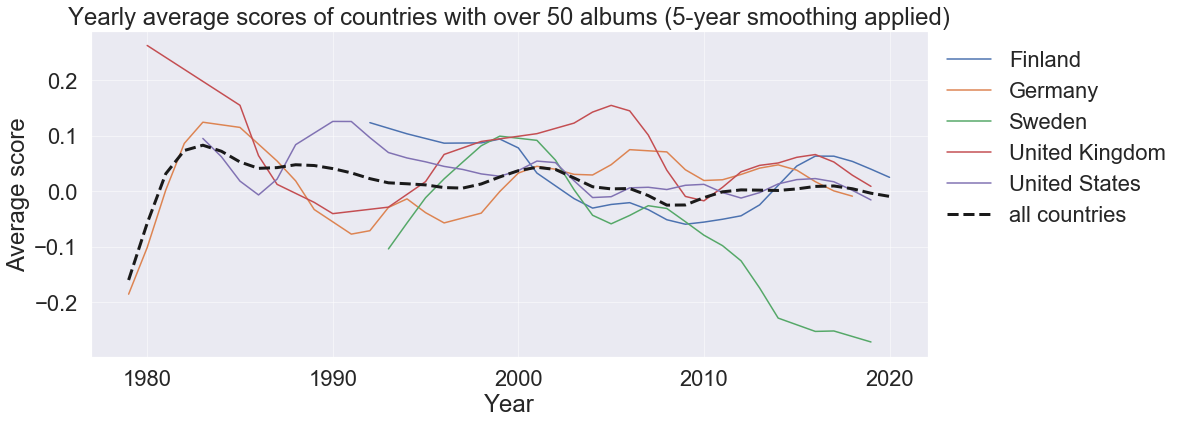

In [283]:
min_albums = 50
smoothing = 5
countries_albums = df_albums.groupby('band_country_of_origin').size()
countries = countries_albums[countries_albums > min_albums]
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
for country in countries.index:
    df = df_albums[df_albums['band_country_of_origin'] == country]
    series = df.groupby('album_year').album_score.mean()
    x = series.index
    y, y_std = gsmooth(series.values, smoothing)
    ax.plot(x, y, label=country)
avg = df_albums.groupby('album_year').album_score.mean()
x = avg.index
y, y_std = gsmooth(avg.values, smoothing)
ax.plot(x, y, 'k--', lw=3, label='all countries')
ax.set_xlabel('Year')
ax.set_ylabel('Average score')
if smoothing > 0:
    title = 'Yearly average scores of countries with over {} albums ({}-year smoothing applied)'.format(min_albums, smoothing)
else:
    title = 'Yearly average scores of countries with over {} albums'.format(min_albums)
ax.set_title(title)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(alpha=0.5)

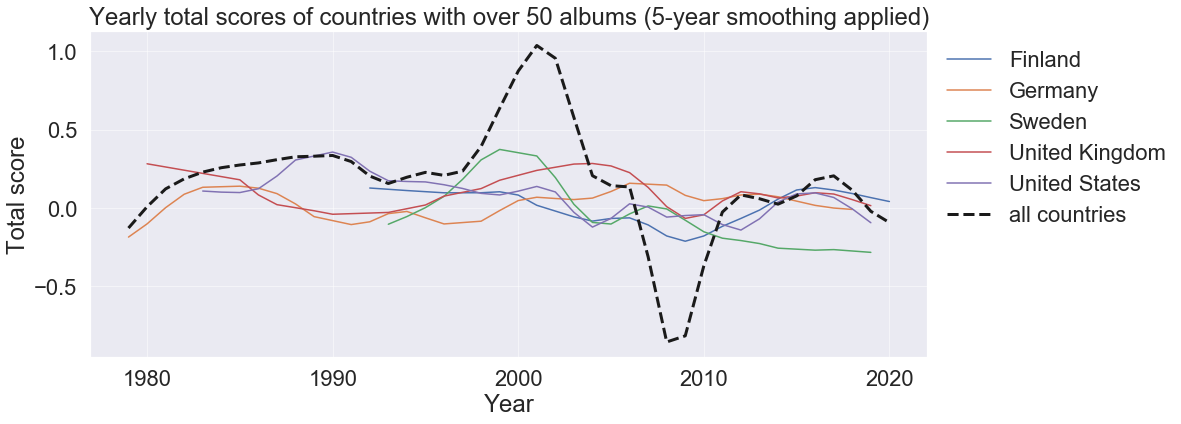

In [284]:
min_albums = 50
smoothing = 5
countries_albums = df_albums.groupby('band_country_of_origin').size()
countries = countries_albums[countries_albums > min_albums]
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
for country in countries.index:
    df = df_albums[df_albums['band_country_of_origin'] == country]
    series = df.groupby('album_year').album_score.sum()
    x = series.index
    y, y_std = gsmooth(series.values, smoothing)
    ax.plot(x, y, label=country)
avg = df_albums.groupby('album_year').album_score.sum()
x = avg.index
y, y_std = gsmooth(avg.values, smoothing)
ax.plot(x, y, 'k--', lw=3, label='all countries')
ax.set_xlabel('Year')
ax.set_ylabel('Total score')
if smoothing > 0:
    title = 'Yearly total scores of countries with over {} albums ({}-year smoothing applied)'.format(min_albums, smoothing)
else:
    title = 'Yearly total scores of countries with over {} albums'.format(min_albums)
ax.set_title(title)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(alpha=0.5)